**Réseau de Neurone** 

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
%pylab inline

#Import dataset
import pathlib
import os
data_dir = pathlib.Path('/content/drive/MyDrive/Original.zip')

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/Original')
print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/Original
/content/datasets/Original


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

847


In [ ]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 847 files belonging to 2 classes.
Using 678 files for training.
Found 847 files belonging to 2 classes.
Using 169 files for validation.
['C1', 'C4']


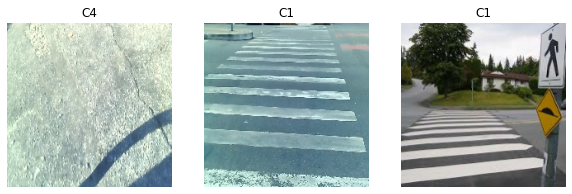

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=50,
  callbacks=[tensorboard_callback]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


226/226 [==============================] - 243s 1s/step - loss: 0.6756 - accuracy: 0.5929 - val_loss: 0.6913 - val_accuracy: 0.5976
Epoch 2/50
226/226 [==============================] - 222s 981ms/step - loss: 0.6844 - accuracy: 0.6239 - val_loss: 0.6508 - val_accuracy: 0.7041
Epoch 3/50
226/226 [==============================] - 214s 949ms/step - loss: 0.6574 - accuracy: 0.6342 - val_loss: 0.6679 - val_accuracy: 0.6213
Epoch 4/50
226/226 [==============================] - 205s 906ms/step - loss: 0.6452 - accuracy: 0.6549 - val_loss: 0.5166 - val_accuracy: 0.7633
Epoch 5/50
226/226 [==============================] - 215s 950ms/step - loss: 0.5657 - accuracy: 0.7360 - val_loss: 0.5121 - val_accuracy: 0.7751
Epoch 6/50
226/226 [==============================] - 214s 947ms/step - loss: 0.5589 - accuracy: 0.7522 - val_loss: 0.6750 - val_accuracy: 0.6450
Epoch 7/50
226/226 [==============================] - 204s 900ms/step - loss: 0.6209 - accuracy: 0.6785 - val_loss: 0.5319 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

Saving StreetNewYork_featured-894x488-14b6891cad934b43643e9cb7be799dbf.png to StreetNewYork_featured-894x488-14b6891cad934b43643e9cb7be799dbf.png


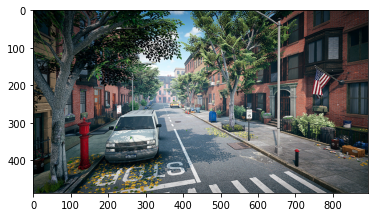

[1]
[[9.1834773e-10 1.0000000e+00]]


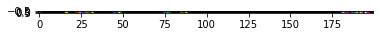

There is no crosswalk


In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    predict_x=model.predict(img_to_predict) 
    res = np.argmax(predict_x,axis=1)
    print(res)
    print(model.predict(img_to_predict))
    if res == 0:
        plt.imshow(cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A crosswalk")
    elif res == 1 :
        plt.imshow(cv2.cvtColor(img_to_predict, cv2.COLOR_BGR2RGB))
        plt.show()
        print("There is no crosswalk")

In [ ]:
#save keras model
model.save("UrbanSensor.h5")


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model=converter.convert()

open("Urbansensor.tflite",'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1rom4uum/assets


INFO:tensorflow:Assets written to: /tmp/tmp1rom4uum/assets


356224

In [ ]:
python__version